In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/textdb3/fake_or_real_news.csv


First we are importing our necessary libaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Next, we we'll be reading the csv file data into a dataframe

In [3]:
news_df=pd.read_csv('/kaggle/input/textdb3/fake_or_real_news.csv')

In [4]:
#getting the first few rows of our data
news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
#getting the last rows of our data
news_df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [6]:
#getting the shape of our data 
news_df.shape

(6335, 4)

So, there are 6335 rows and 4 columns

In [7]:
news=news_df.label
news.value_counts()
news

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [8]:
#getting the count of occurences of number of fake and real in the labels coulmn
news_df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

So, There are 3171 Real and 3164 Fake values in label column

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

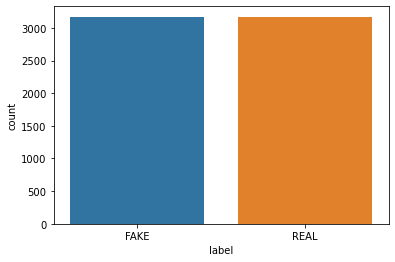

In [9]:
#visualizing the count of Real and Fake values
sns.countplot(news_df['label'])

In [10]:
#we'll now split our dataset into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(news_df['text'], news, test_size=0.2, random_state=7)

We'll now initialize a Tfidf Vectorizer with stop words from the English language and a maximum document frequency of 0.7 . Tf means term frequency as in how many times a word is appearing in the text file. 
Tf=(Number of repetition of a word in text/Number of words in the text). 

idf is Inverse Document Frequency which is used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. 
idf = log(number of texts(document frequency)/ Number of texts containg that word). 

Then, tfidf creates a document term matrix where it has columns for each individual word and there are cells containing the weight of each unique word signifying how important that word is for that text.
tfidf = tf * idf

In [11]:
tfidf=TfidfVectorizer(stop_words='english', max_df=0.7)

stop_words="english" means the words in English language that ain't give much meaning to the text and can be safely ignored

max_df = 0.7 means that we will be including only those words that occur in a maximum of 70% of all the documents. Words that occur in almost every document are usually not suitable for classification because they do not provide any unique information about the document.

In [12]:
tfidf_train=tfidf.fit_transform(x_train) #fit and transform the train dataset
tfidf_test=tfidf.transform(x_test)       #transform the test dataset

In [13]:
tfidf_train.shape

(5068, 61651)

There are 5068 rows in train dataset 

In [14]:
tfidf_test.shape

(1267, 61651)

There are 1267 rows in test dataset

We’ll now initialize a PassiveAggressiveClassifier. 
PassiveAgressiveClassifier is a classification algorithm in Machine Learning based on online learning Algorithm. Passive is for correct predictions or classifications, in this the model does not go through changes and is kept as it is and Agressive is for incorrect predictions,in this the model is changed 

We’ll fit this on tfidf_train and y_train.
Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() and a confusion matrix to see the performance of the model.

**PassiveAgressiveClassifier** is based on online learning Algorithm, in which the input data comes in sequential order and the machine Learning model is updated step by step. It is used mostly when there's a big stream of data documents fall in one by one and we need to get labels for each document. Basicaaly the Passive Agressive Algorithm works as getting an example, learning from that example and throwing it away. It remains Passive if a prediction is correct, it will keep that model and not make any changes that is the data or the information that's hidden in the example is not enough for updating and Aggressive when the prediction is incorrect,then changes are made to the model and updated to adjust to the misclassified example.

In [15]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
pac_acc=round(score*100,2)
print(f'Accuracy: {pac_acc}%')

Accuracy: 92.58%


In [16]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(tfidf_train,y_train)
y_pred2=dec.predict(tfidf_test)
score2=accuracy_score(y_test,y_pred2)
dec_acc=round(score2*100,2)
print(f'Accuracy: {dec_acc}%')

Accuracy: 79.08%


In [17]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier()
ran.fit(tfidf_train,y_train)
y_pred3=ran.predict(tfidf_test)
score3=accuracy_score(y_test,y_pred3)
ran_acc=round(score3*100,2)
print(f'Accuracy: {ran_acc}%')

Accuracy: 89.58%


In [18]:
labels={'PassiveAggressiveClassifier':pac_acc,'DecisionTreeClassifier':dec_acc,'RandomForestClassifier':ran_acc}
for model,accuracy in labels.items():
    print(str(model)+' : '+str(accuracy))

PassiveAggressiveClassifier : 92.58
DecisionTreeClassifier : 79.08
RandomForestClassifier : 89.58


<BarContainer object of 3 artists>

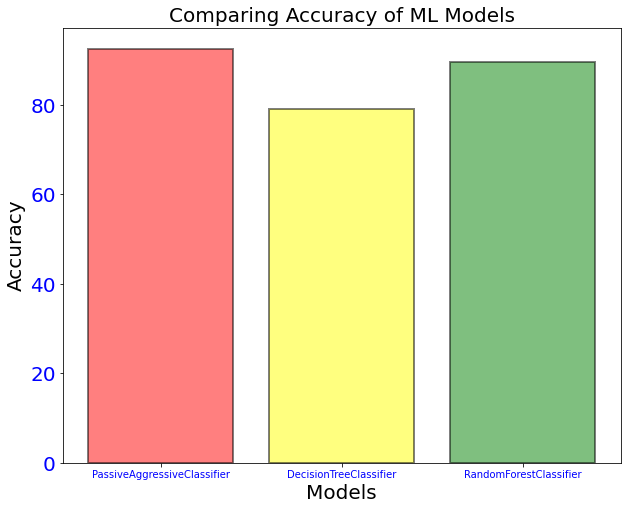

In [19]:
plt.figure(figsize=(10,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','green']
plt.xticks(fontsize=10,color='blue')
plt.yticks(fontsize=20,color='blue')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5)

we could see that PassiveAgressive gave the highest accuracy score than the other two. 

Now,plotting Confusion Matrix will gives us insight to not only into the errors being made by your classifier but more importantly the types of errors that are being made.It will let us know the number of false and true negatives and positives.

In [20]:
pac_con=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print("Confusion Matrix for PassiveAgressiveClassifier",end="\n")
print(pac_con)

Confusion Matrix for PassiveAgressiveClassifier
[[587  51]
 [ 43 586]]


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

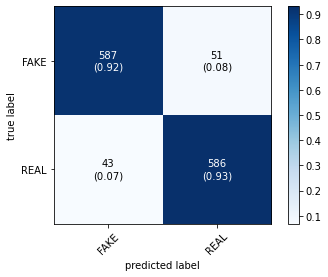

In [24]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=pac_con, show_absolute=True,show_normed=True,colorbar=True,class_names=['FAKE','REAL'])

So, From Confusion Matrix of PassiveAgreesiveClassifier we see that the “true positive” that is for correctly predicted fake label values is 587 while “true negative” that is for correctly predicted real label values is 586. There are then 587 text documents correctly identified as fake and 586 text documents as Real. 
We could also see that more errors were made by predicting real labels as fake then predicting fake labels as real.

In [21]:
dec_con=confusion_matrix(y_test,y_pred2, labels=['FAKE','REAL'])
print("Confusion Matrix for DecisionTreeClassifier",end="\n")
print(dec_con)

Confusion Matrix for DecisionTreeClassifier
[[511 127]
 [138 491]]


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

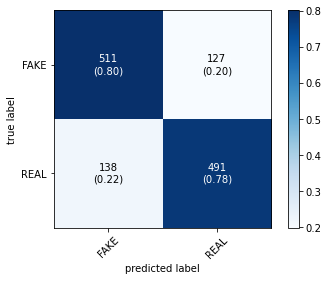

In [25]:
plot_confusion_matrix(conf_mat=dec_con, show_absolute=True,show_normed=True,colorbar=True,class_names=['FAKE','REAL'])

From the confusion matrix of DecisionTree Classifier, we could see that errors made in predicting the text labels as real or fake is large.

In [22]:
ran_con=confusion_matrix(y_test,y_pred3, labels=['FAKE','REAL'])
print("Confusion Matrix for RandomForestClassifier",end="\n")
print(ran_con)

Confusion Matrix for RandomForestClassifier
[[572  66]
 [ 66 563]]


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

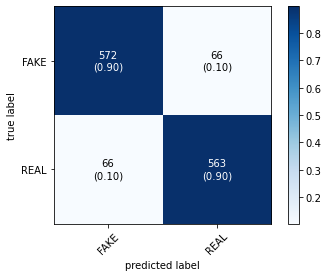

In [26]:
plot_confusion_matrix(conf_mat=ran_con, show_absolute=True,show_normed=True,colorbar=True,class_names=['FAKE','REAL'])

Now, if you compare all the three Algorithms on the basis of confusion Matrix. PassiveAgressiveClassifier gave the best results because While predicting it gave the least errors.